# NGHIÊN CỨU MÔ HÌNH CHUYỂN ĐỔI KHÁCH HÀNG ĐI VAY TẠI NGÂN HÀNG

# 1. Lời mở đầu
## ***Lý do chọn đề tài***
   Tình hình cho vay khách hàng cá nhân tại ngân hàng Thera Bank những năm vừa qua đã có lượng khách hàng ngày càng tăng song nó vẫn còn chứa đựng nhiều tồn tại cần được khắc phục. Để hoạt động ngân hàng ngày càng đạt hiệu quả cao hơn, hạn chế thấp nhất các rủi ro cho vay, ngân hàng cần đặc biệt quan tâm đến việc ***nâng cao hiệu quả cho vay khách hàng cá nhân trong thời gian tới***. Điều này có ý nghĩa bao hàm cả việc nâng cao năng lực hoạt động trong quá trình cạnh tranh, hội nhập với khu vực và thế giới. Ngân hàng là một trung gian tài chính, là một kênh dẫn vốn quan trọng cho toàn bộ nền kinh tế. Trong môi trường cạnh tranh ngày càng gay gắt, việc hoàn thiện và mở rộng các hoạt động là hướng đi và cũng là phương châm cho các Ngân hàng tồn tại và phát triển. Trong các hoạt động của Ngân hàng có hoạt động cho vay là hoạt động quan trọng hàng đầu, và đã trở thành một trong hai nhiệm vụ cơ bản của ngân hàng. Đây cũng là nghiệp vụ kinh doanh chủ yếu của Ngân Hàng từ trước tới nay bởi vì chỉ có lãi cho vay mới bù đắp lại các chi phí phát sinh của ngân hàng như chi phí trung gian, chi phí quản lý, chi phí dự trữ… Có thể thấy, thực trạng hiện nay các Ngân Hàng thường chỉ chú trọng cho vay khách hàng doanh nghiệp mà chưa quan tâm đến cho vay khách hàng cá nhân . Tuy nhiên, do không thuộc khối bán lẻ nên khi mở rộng hoạt động cho vay đối tượng này, những vướng mắc, rủi ro là không thể tránh khỏi. Do đó, Ngân hàng Thera Bank vẫn còn nhiều e ngại trong cho vay đối với các KHCN. Hoạt động cho vay KHCN chưa tương xứng với tiềm năng của Ngân Hàng, còn rất nhiều lúng túng trong việc triển khai hoạt động cho vay KHCN tại Ngân hàng. Vì vậy, nâng cao hiệu quả cho vay KHCN là một vấn đề cấp thiết, nó liên quan đến kế hoạch mở rộng thị trường KHCN và tác động tới lợi nhuận, sự tăng trưởng, cân đối, an toàn trong hoạt động tín dụng của Ngân hàng. Xuất phát từ quan điểm trên, nhóm 5 đã chọn đề tài  ***"Phân tích yếu tố ảnh hưởng nhiều nhất đến quyết định chuyển đổi từ người gửi tiết kiệm thành người vay"***
> <strong>MỤC TIÊU:</strong> 
>- Để dự đoán liệu một khách hàng gửi tiết kiệm sẽ mua một khoản vay cá nhân hay không?
>- Biến nào là quan trọng nhất?
>- Nên nhắm đến phân khúc khách hàng nào nhiều hơn?
>- Tuổi tác có ảnh hưởng gì đến khoản vay mua của khách hàng không?
>- Người có thu nhập thấp có vay được không?
## ***Cài đặt ban đầu và nguồn Data***
### 1. Liên kết đến Database: [DATABASE](https://drive.google.com/file/d/1sVmF859NReltoDoMoIdus9I1Hg3-zoGF/view?usp=sharing)
### 2. Cài đặt ban đầu

In [1]:
import pandas as pd #xử lý dữ liệu
import numpy as np #đại số tuyến tính
import matplotlib.pyplot as plt #là một giao diện dựa trên trạng thái cho matplotlib. Nó cung cấp một cách lập kế hoạch giống như MATLAB
import seaborn as sns # thư viện dựa trên trực quan hóa dữ liệu dựa trên matplotlib
%matplotlib inline 

from sklearn.model_selection import train_test_split #chia mảng hoặc ma trận thành tập con thử nghiệm và huấn luyện ngẫu nhiên
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression #Logistic Regression (aka logit, MaxEnt) classifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

from sklearn import metrics #bao gồm các hàm điểm, chỉ số hiệu suất và các chỉ số theo cặp và tính toán khoảng cách
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, classification_report
#Xây dựng báo cáo văn bản hiển thị các chỉ số phân loại chính, Tính toán ma trận nhầm lẫn để đánh giá độ chính xác của phân loại.

In [2]:
df = pd.read_csv("data.csv")

# 2. Nội dung
## 2.1. Làm sạch dữ liệu


In [3]:
### Loại bỏ các cột không có paper đính kèm
df1 = df.drop(['ID','Experience','ZIP Code','CCAvg','Securities Account','CD Account','Online','CreditCard'],axis='columns')
df1.shape
### Tạo dataframe gồm 10 biến đầu tiên sau khi đã loại bỏ các biến không có paper
df2=df1.head(10)

## 2.2. Tổng quan về các biến
### ***Mô tả các biến***

In [4]:
### Hiển thị tên các biến (cột) trong mô hình
df2.columns

Index(['Age', 'Income', 'Family', 'Education', 'Mortgage', 'Personal Loan'], dtype='object')

>- Age: Customer’s age in completed years

>- Income: Annual income of the customer (in thousand dollars)

>- Family: the Family size of the customer

>- Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional

>- Mortgage: Value of house mortgage if any. (in thousand dollars)

>- Personal_Loan: Did this customer accept the personal loan offered in the last campaign?

### ***Bảng thống kê mô tả các biến***

In [5]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,10.0,38.8,8.337332,25.0,35.00,36.0,43.50,53.0
Income,10.0,62.3,49.844313,11.0,30.25,47.0,78.75,180.0
Family,10.0,2.4,1.349897,1.0,1.00,2.5,3.75,4.0
Education,10.0,1.9,0.737865,1.0,1.25,2.0,2.00,3.0
Mortgage,10.0,25.9,55.909550,0.0,0.00,0.0,0.00,155.0
Personal Loan,10.0,0.1,0.316228,0.0,0.00,0.0,0.00,1.0


> <strong>Nhận xét</strong>
>- Dựa vào bảng thống kê mô tả cho thấy độ tuổi trung nằm ở khoảng 38 tuổi
>- Thu nhập hàng năm của khách hàng ở mức 62.3
>- Quy mô gia đình đạt mức khá
>- Trình độ học vấn đạt ở mức đã tốt nghiệp
>- Giá trị thế chấp đạt ở mức trung bình khoảng 25.9
>- ***Và khách hàng sẽ có xu hướng không chấp nhận khoản vay cá nhân được cung cấp trong chiến dịch cuối cùng***

In [6]:
print ("Number of people with zero personal loan:", (df2['Personal Loan']==0).sum())

Number of people with zero personal loan: 9


***Trong dữ liệu, ta có số người không chấp nhận chuyển đổi khoản vay tại ngân hàng là 9 người, chấp nhận là 1 người***

## 2.3. Phân tích từng biến độc lập trong mô hình
#### Dựa vào các paper, ta có
> <strong>Các yếu tố có thể ảnh hưởng đến việc cho vay vốn gồm 5 đặc điểm sau</strong>
>- Thu nhập (Income)
>- Trình độ học vấn (Education)
>- Tuổi (Age)
>- Gia đình (Family)
>- Thế chấp (Mortgage) . 

***Những đặc điểm này là các biến chính được sử dụng trong việc tiếp thị để thu hút khách hàng mới.***
- Thu nhập (Income) đóng một vai trò quan trọng trong việc tác động đến khả năng để trả các khoản vay của họ. 
- Trình độ học vấn (Education) có liên quan đến tư duy. Về kỹ năng tiếp thu kiến thức của khách hàng có thể kết luận rằng kiến thức về giá sẽ tỉ lệ thuận với trình độ học vấn. 
- Tuổi (Age) có liên quan đến việc thăm dò và tìm kiếm. Khách hàng lớn tuổi tìm kiếm ít và kém chính xác hơn so với khách hàng trẻ tuổi. Do đó, khách hàng lớn tuổi sẽ ít tiếp cận thông tin giá cả khi tìm kiếm các dịch vụ tài chính hơn so với khách hàng trẻ từ đó độ có ảnh hưởng đến kiến thức về giá. 
- Một nghiên cứu của Paloma cho rằng , gia đình (Family) đã tác động đến cá nhân để sử dụng khoản vay. 
- Ngoài ra, để được sử dụng một khoản vay từ ngân hàng, thế chấp (Mortgage) là điều kiện cần để cho phép khách hàng sử dụng dịch vụ vay


### 2.3.1. Tiến hành phân tích đối với biến X1 = Age

[[3]]


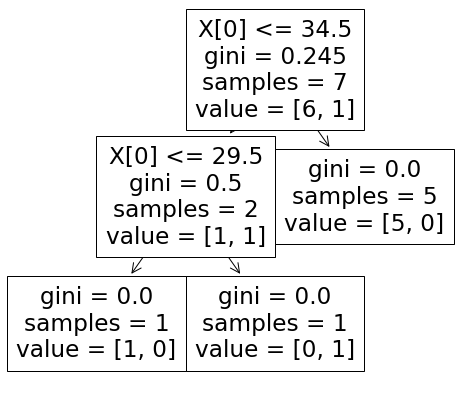

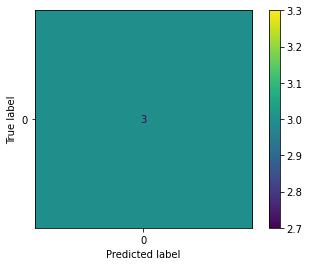

In [7]:
#X1=Age
###Tạo biến
y=df2['Personal Loan'].values.reshape(-1,1) #tương ứng 10 hàng và 1 cột cho biến phụ thuộc
X1=df2.drop(columns=['Personal Loan','Income','Family','Education','Mortgage']).values

###Split dữ liệu
X1_train,X1_test,y_train, y_test =train_test_split(X1, y, random_state=42, test_size=0.3)

###Tạo DecisionTree
my_tree=DecisionTreeClassifier()
my_tree.fit(X1_train, y_train)

###Dự đoán dữ liệu test
y_pred=my_tree.predict(X1_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

###Vẽ 
fig=plt.figure(figsize=(8,7))
tree.plot_tree(my_tree)
plot_confusion_matrix(my_tree, X1_test, y_test)

> <strong>Nhận xét</strong>
- Có 7 người dưới độ tuổi 34.5. Trong đó có 6 người chọn phương án không trở thành người đi vay, 1 người trở thành người đi vay => Có ***86%*** tổng số người dưới độ tuổi 34.5 chọn không trở thành người đi vay.
- Có 2 người dưới độ tuổi 29.5. Trong đó có 1 người chọn trở thành người đi vay và 1 người chọn không trở thành người đi vay.
- Gini = 0.5, cho thấy sự phân bố đồng đều giữa những người có độ tuổi dưới 29.5
- Gini = 0, biểu thị rằng có 1 người duy nhất sẽ chọn phương án không trở thành người đi vay hoặc người đi vay.
- Dự đoán đúng trong 10 người có độ tuổi nhỏ hơn hoặc bằng 34.5, có 3 người trong bộ dữ liệu không mua khoản vay tại ngân hàng      => Có ***30%*** chọn không mua khoản vay tạo ngân hàng


### 2.3.2. Tiến hành phân tích đối với biến X2 = Income

[[3]]


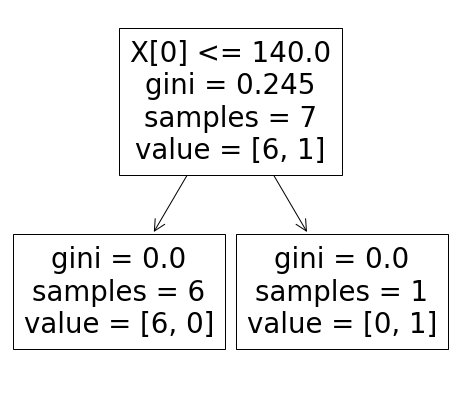

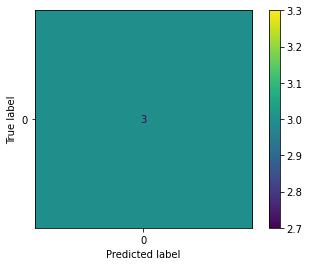

In [8]:
#X2=Income
###Tạo biến
y=df2['Personal Loan'].values.reshape(-1,1) #tương ứng 10 hàng và 1 cột cho biến phụ thuộc
X2=df2.drop(columns=['Personal Loan','Age','Family','Education','Mortgage']).values

###Split dữ liệu
X2_train,X2_test,y_train, y_test =train_test_split(X2, y, random_state=42, test_size=0.3)

###Tạo DecisionTree
my_tree=DecisionTreeClassifier()
my_tree.fit(X2_train, y_train)

###Dự đoán dữ liệu test
y_pred=my_tree.predict(X2_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

###Vẽ 
fig=plt.figure(figsize=(8,7))
tree.plot_tree(my_tree)
plot_confusion_matrix(my_tree, X2_test, y_test)

> <strong>Nhận xét</strong>
- Có 7 người có thu nhập dưới 140. Trong đó có 6 người chọn phương án không trở thành người đi vay, 1 người trở thành người đi vay.
- Gini = 0.245 cho thấy trong số 7 người thì không hoàn toàn cùng thuộc 1 sự lựa chọn.
- Gini = 0 cho thấy trong số 6 người thì tất cả 6 người đều thuộc về phương án trở thành người không đi vay. Và 1 người duy nhất thuộc về phương án trở thành người đi vay => Có ***86%*** tổng số người có thu nhập dưới 140 chọn không trở thành người đi vay
- Dự đoán đúng trong 10 người có thu nhập nhỏ hơn hoặc bằng 140 thì có 3 người trong bộ dữ liệu không mua khoản vay tại ngân hàng => Có ***30%*** chọn không mua khoản vay tạo ngân hàng


### 2.3.3. Tiến hành phân tích đối với biến X3 = Family

[[3]]


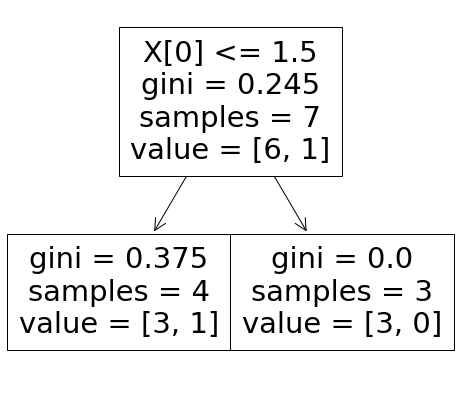

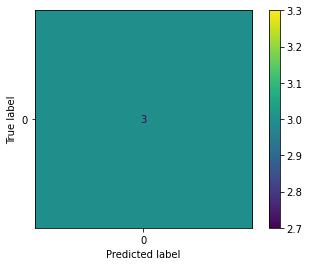

In [9]:
#X3=Family
###Tạo biến
y=df2['Personal Loan'].values.reshape(-1,1) #tương ứng 10 hàng và 1 cột cho biến phụ thuộc
X3=df2.drop(columns=['Personal Loan','Age','Income','Education','Mortgage']).values

###Split dữ liệu
X3_train,X3_test,y_train, y_test =train_test_split(X3, y, random_state=42, test_size=0.3)

###Tạo DecisionTree
my_tree=DecisionTreeClassifier()
my_tree.fit(X3_train, y_train)

###Dự đoán dữ liệu test
y_pred=my_tree.predict(X3_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

###Vẽ 
fig=plt.figure(figsize=(8,7))
tree.plot_tree(my_tree)
plot_confusion_matrix(my_tree, X3_test, y_test)

> <strong>Nhận xét</strong>
- Có 7 người có quy mô gia đình dưới 1.5. Trong đó có 6 người chọn phương án không trở thành người đi vay, 1 người trở thành người đi vay. 
- Gini = 0.245 cho thấy trong số 7 người thì không hoàn toàn cùng thuộc 1 sự lựa chọn.
- Gini = 0.375 cho thấy rằng trong số 6 người thì không hoàn toàn cùng thuộc 1 lựa. 
- Gini = 0 cho thấy trong số 3 người thì tất cả 3 người đều thuộc về phương án trở thành người không đi vay.
- Dự đoán đúng trong 10 người có quy mô gia đình nhỏ hơn hoặc bằng 1.5 thì có 3 người trong bộ dữ liệu không mua khoản vay tại ngân hàng => Có ***30%*** chọn không mua khoản vay tạo ngân hàng


### 2.3.4. Tiến hành phân tích đối với biến X4 = Education

[[3]]


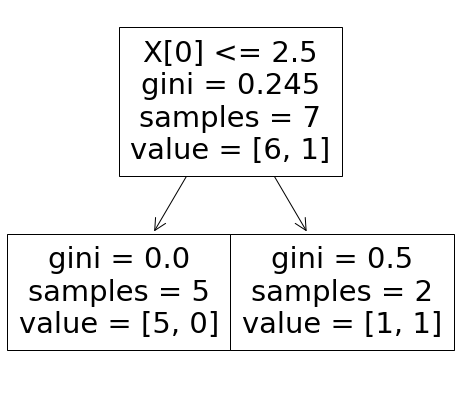

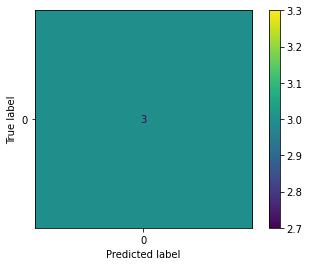

In [10]:
#X4=Education
###Tạo biến
y=df2['Personal Loan'].values.reshape(-1,1) #tương ứng 10 hàng và 1 cột cho biến phụ thuộc
X4=df2.drop(columns=['Personal Loan','Age','Family','Income','Mortgage']).values

###Split dữ liệu
X4_train,X4_test,y_train, y_test =train_test_split(X4, y, random_state=42, test_size=0.3)

###Tạo DecisionTree
my_tree=DecisionTreeClassifier()
my_tree.fit(X4_train, y_train)

###Dự đoán dữ liệu test
y_pred=my_tree.predict(X4_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

###Vẽ 
fig=plt.figure(figsize=(8,7))
tree.plot_tree(my_tree)
plot_confusion_matrix(my_tree, X4_test, y_test)

> <strong>Nhận xét</strong>
- Có 7 người có trình độ học vấn dưới 2.5. Trong đó có 6 người chọn phương án không trở thành người đi vay, 1 người trở thành người đi vay. 
- Gini = 0.245 cho thấy trong số 7 người thì không hoàn toàn cùng thuộc 1 sự lựa chọn.
- Gini = 0.0 cho thấy rằng trong số 5 thì tất cả 5 người đều thuộc về phương án trở thành người không đi vay. 
- Gini = 0.5 cho thấy sự phân bố đồng đều về 2 lựa chọn giữa 2 người trong data .
- Dự đoán đúng trong 10 người có học vấn nhỏ hơn hoặc bằng 2.5 thì có 3 người trong bộ dữ liệu không mua khoản vay tại ngân hàng => Có ***30%*** chọn không mua khoản vay tạo ngân hàng


### 2.3.5. Tiến hành phân tích đối với biến X5 = Mortgage

#### Tạo biến x5 đã mã hóa những người không có thế chấp = 0 và còn lại có thế chấp = 1 

In [11]:
df2['X5']=np.where(df2['Mortgage']>0,1,0)

<ipython-input-11-757094e74822>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['X5']=np.where(df2['Mortgage']>0,1,0)


[[3]]


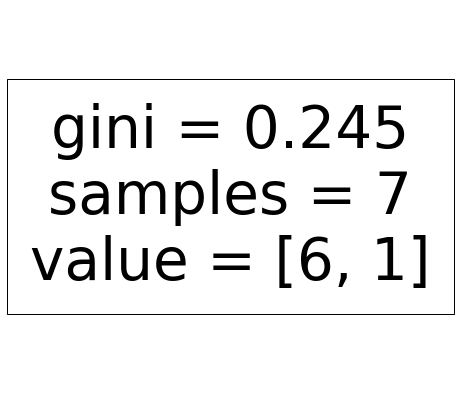

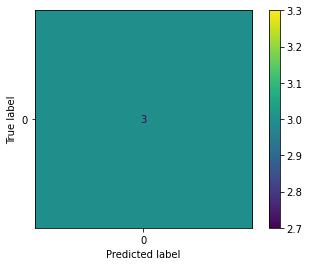

In [12]:
#X5=Mortgage
###Tạo biến
y=df2['Personal Loan'].values.reshape(-1,1) #tương ứng 10 hàng và 1 cột cho biến phụ thuộc
X5=df2.drop(columns=['Personal Loan','Age','Family','Income','Education','Mortgage']).values

###Split dữ liệu
X5_train,X5_test,y_train, y_test =train_test_split(X5, y, random_state=42, test_size=0.3)

###Tạo DecisionTree
my_tree=DecisionTreeClassifier()
my_tree.fit(X5_train, y_train)

###Dự đoán dữ liệu test
y_pred=my_tree.predict(X5_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

###Vẽ 
fig=plt.figure(figsize=(8,7))
tree.plot_tree(my_tree)
plot_confusion_matrix(my_tree, X5_test, y_test)

> <strong>Nhận xét</strong>
- Có 7 người trong số 10 người đang được lấy ra. Trong đó có 6 người chọn phương án không trở thành người đi vay, 1 người trở thành người đi vay. 
- Gini = 0.245 cho thấy trong số 7 người thì không hoàn toàn cùng thuộc 1 sự lựa chọn.
- Gini = 0.0 cho thấy rằng trong số 5 thì tất cả 5 người đều thuộc về phương án trở thành người không đi vay. 
- Gini = 0.5 cho thấy sự phân bố đồng đều về 2 lựa chọn giữa 2 người trong data 
- Dự đoán đúng trong 10 người có giá trị thế chấp đang xét thì có 3 người trong data không mua khoản vay tại ngân hàng => Có ***30%*** chọn không mua khoản vay tạo ngân hàng


### 2.3.6. Tính toán lại bằng phương pháp thủ công (by hand)

#### [LINK PDF](https://drive.google.com/file/d/1skouL2-Cg1xGYMrb-9PVQBy4OS91oCSW/view?usp=sharing)

### 2.3.7. Nhận xét chung

**Sau khi phân tích từng biến với biến phụ thuộc ta có thể rút ra được những chỉ số nào sẽ giúp ngân hàng có khả năng thu hút khách hàng sử dụng khoản vay hơn là**
1. Tuổi từ 35 trở lên
2. Thu nhập lớn hơn 140
3. Gia đình có 2 thành viên trở lên
4. Học vấn phải ở mức tốt nghiệp đại học hoặc theo học thạc sĩ/ tiến sĩ
5. Không cần thiết phải có tài sản thế chấp

## 2.4. Mô hình DesicionTree với tất cả các biến
### 2.4.1. Chạy mô hình với 5 biến phụ thuộc

(10, 6)
(10, 1)


[Text(251.10000000000002, 366.93, 'Income <= 140.0\ngini = 0.198\nsamples = 9\nvalue = [8, 1]\nclass = P'),
 Text(125.55000000000001, 122.31, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]\nclass = P'),
 Text(376.65000000000003, 122.31, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = e')]

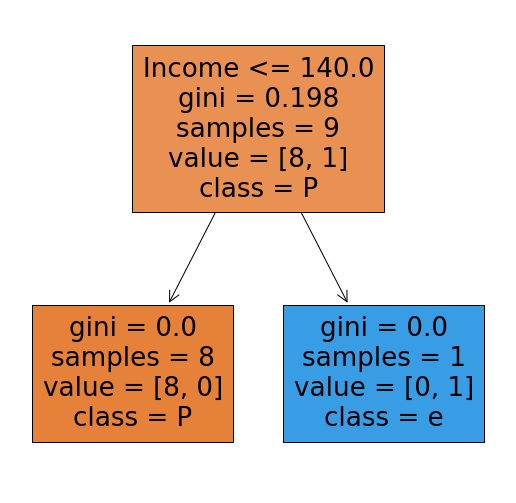

In [13]:
y=df2['Personal Loan'].values.reshape(-1,1)
X=df2.drop(columns=['Personal Loan']).values
print(X.shape)
print(y.shape)

### Split dữ liệu
X_train,X_test,y_train, y_test =train_test_split(X, y, random_state=42, test_size=0.1)

### Tạo mô hình cây
my_tree=DecisionTreeClassifier()
my_tree.fit(X_train, y_train)

### Vẽ
fig=plt.figure(figsize=(9,9))
tree.plot_tree(my_tree , feature_names = ['Age','Income','Family','Education','Mortgage'] , class_names = 'Personal Loan' , filled=True)

> <strong>Nhận xét:</strong>
> - Theo như sơ đồ cây quyết định cho thấy, trong 9 quan sát này thì có 8 người là không chấp nhận chuyển sang người đi vay, có 1 người là chấp nhận chuyển sang người đi vay. Ở mức thu nhập nhỏ hơn 140.0 thì có 8 người và cả 8 người này đều không có nhu cầu chuyển thành người đi vay. Còn ở mức thu nhập trên 140.0 thì có 1 người quyết định trở thành người đi vay. 
> - Hệ số gini <= 0,5 cho thấy giữa 2 nhóm người không có sự khác nhau về lựa chọn quyết định.
> - => Biến ‘Income’ là biến có ảnh hưởng mạnh nhất.


#### ***Do hệ số gini ở các cây đều bé hơn hoặc bằng 0.5, điều này có nghĩa các điều kiện khi đưa ra các quyết định của các quan sát là như nhau. Các quan sát đưa ra lựa chọn trong môi trường hoàn cảnh giống nhau. Nên có thể nói các quyết định đưa ra có độ chính xác cao.***

### ***Tính toán thủ công (by hand)***

#### [LINK](https://drive.google.com/file/d/1hmgxBTrbNx4aWjHGYxBJ593kdQ93oNuc/view?usp=sharing)

### ***Kiểm tra lại bằng ma trận tương quan***

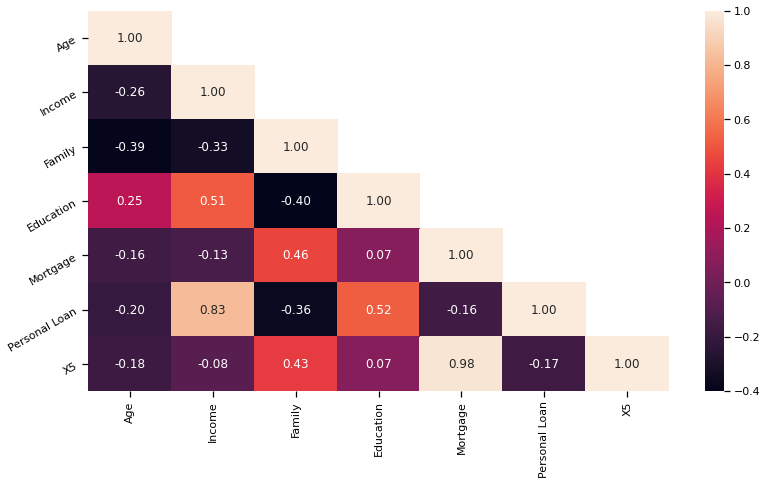

In [14]:
corr = df2.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

>- ***Từ ma trận tương quan có thể thấy biến Income là biến có mối quan hệ chặt chẽ nhất với biến phụ thuộc nên mô hình đưa ra là khá chính xác.***

### ***Kiểm tra lại bằng Classification report***

In [15]:
model = LogisticRegression(solver = 'liblinear')
model.fit(X_train, y_train)

y_predicted = model.predict(X_test)

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Độ chính xác(Precision): Phần thực tế trên mỗi nhãn được phân loại chính xác theo mô hình

Nhắc lại (Recall): Phần dự đoán đã được mô hình phân loại chính xác

Điểm F1: Trung bình điều hòa có trọng số của độ chính xác và thu hồi. 

Hỗ trợ (Supports): Số lần xuất hiện của mỗi lớp trong y_test

Độ chính xác (Accuracy): Một phần của tất cả các quan sát được mô hình phân loại chính xác

Trung bình macro (Marco Avg): Tính toán số liệu cho từng nhãn và tìm giá trị trung bình không trọng số của chúng. Điều này không tính đến sự mất cân bằng nhãn

Trung bình vi mô (có trọng số): Tính toán các chỉ số trên toàn cầu bằng cách đếm tổng số dương tính thật, phủ định sai và dương tính giả

AUC: Xác suất mà một bộ phân loại sẽ xếp hạng một mẫu dương tính ngẫu nhiên cao hơn một mẫu âm tính ngẫu nhiên.

>- ***Một mô hình phân lớp tốt là mô hình có cả Precision và Recall đều cao, tức càng gần một càng tốt. Vậy mô hình của nhóm - với 10 dữ liệu đầu tiên của bộ data đã đạt được kết quả cao (=1)***

## 2.5. Kiểm tra lại mô hình
### 2.5.1 Tạo lại model

In [23]:
model = tree.DecisionTreeClassifier()

In [24]:
y=df2['Personal Loan'].values.reshape(-1,1) #tương ứng 10 hàng và 1 cột cho biến phụ thuộc
X=df2.drop(columns=['Personal Loan','X5']).values

In [27]:
model.fit(X, y)

DecisionTreeClassifier()

### 2.5.2. Kiểm tra lại mô hình với các chỉ số của cây ở phần trước
***Ví dụ: Với một người từ độ tuổi 34, có thu nhập bằng 140, gia đình chỉ có 1 thành viên , đã tốt nghiệp đại học và không có tài sản thế chấp thì có thể vay không?***

In [28]:
model.predict([[34, 140, 1, 1, 0 ]])

array([0], dtype=int64)

#### - Giá trị xuất ra là array([0]) nên người đó sẽ lựa chọn không sử dụng khoản vay của ngân hàng

## 2.6. Đánh giá hiệu suất mô hình

In [30]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

Vì module ‘graphviz’ không có sẵn trên jupyter, vì vậy ta chạy lệnh “conda install python-graphviz” để có thể import “graphviz”


In [31]:
conda install python-graphviz

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


- **Tiếp theo là sử dụng hàm export_graphviz để biểu đồ hoá cây quyết định.**
- **Trong hàm này chúng ta chỉ cần truyền vào mô hình, tên các đặc trưng đầu vào thông qua đối số feature_names và các nhãn thông qua đối số class_names.**

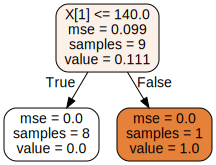

In [32]:
import graphviz

dot_data = tree.export_graphviz(model, out_file=None, 
                                class_names=['low', 'high'],
                                rounded=True,
                                filled=True)
graph = graphviz.Source(dot_data, format="png")
graph

> <strong>Nhận xét:</strong>
>- Từ cây quyết định ở trên, dựa trên việc rẽ nhánh, chúng ta suy ra được nhãn dự báo cho các quan sát. 
 1. Đầu tiên là điều kiện để tách. X[1]  ≤ 140.0
 2. Sau đó là chỉ số squared_error ở node nó. 
 3. Sample: là tổng số dữ liệu ở node đó.
 4. Value tại nhánh trái và phải lần lượt là 0 và 1. Do sơ đồ cây dừng tại đây nên không có dữ liệu nào được rẽ nhánh thêm.
>- X[1]: Income ≤ 140.0 là True, như vậy tại node gốc ta rẽ sang nhánh True bên trái.
>- Giá trị squared_error tại X[1] = 0.122, RMSE = 0.349285. Chỉ số RMSE của X[1] < 
1 và hướng về gần bằng 0, chỉ số RMSE của nhánh trái = 0, cả 2 cho thấy hiệu suất của mô hình có thể đạt kết quả cao nhất.


In [22]:
X[1]

array([45, 34,  3,  1,  0], dtype=int64)

Với độ tuổi 45, thu nhập là 34, gia đình có 3 thành viên, học vấn đang học Đại học và không có thế chấp

## 2.7. Trả lời các câu hỏi trong đề bài

### 1. Các biến chính có mối quan hệ chặt chẽ với biến phụ thuộc là gì?
>- Dựa trên ma trận tương quan papers có thể thấy những biến chính có mối quan hệ chặt chẽ với biến phụ thuộc theo thứ tự giảm dần là
 1. Biến Thu nhập (Income)
 2. Biến Học vấn (Education)
 3. Biến Tuổi (Age)
 4. Biến Gia đình (Family)
 5. Biến Thế chấp (Mortgage)
 
### 2. Các dự đoán của Mô hình chính xác đến mức nào và nó có thể được cải thiện không?
> - Có thể nói đối với bộ dữ liệu mẫu gồm 10 data thì mô hình khá chính xác và không cần cải thiện thêm dựa vào
 1. Classification Report
 2. Hệ số Gini
### 3. Số liệu nào phù hợp để đánh giá hiệu suất mô hình và tại sao?
>- Lỗi trung bình bình phương (RMSE) là độ lệch chuẩn của phần dư (lỗi dự đoán). Phần dư là thước đo khoảng cách từ các điểm dữ liệu đường hồi quy - RMSE là thước đo mức độ lan truyền của những phần dư này. Nói cách khác, nó cho bạn biết mức độ tập trung của dữ liệu xung quanh dòng phù hợp nhất.
>- Lỗi trung bình bình phương gốc (MSE) là thước đo mức độ hiệu quả của mô hình của bạn. Nó thực hiện điều này bằng cách đo sự khác biệt giữa các giá trị dự đoán và giá trị thực tế . R-MSE càng nhỏ tức là sai số càng bé thì mức độ ước lượng cho thấy độ tin cậy của mô hình có thể đạt cao nhất"
- Vì lý do tiêu chí MSE không được dùng trong phiên bản V.1.0, và bị đào thải ở phiên bản V.1.2, sử dụng tiêu chí "Squared_error" tương đương "MSE". Nên các giá trị Squared_error phía trên được hiểu là giá trị "MSE"
- Từ cây quyết định ở trên, dựa trên việc rẽ nhánh, chúng ta suy ra được nhãn dự báo cho các quan sát. Khi đó xuất phát từ node gốc ta tuần tự đặt và trả lời câu hỏi
- x[1] <= 140.0 là True, như vậy tại node gốc ta rẽ sang nhánh True bên trái.
- Giá tị squared_error tại X[1] = 0.122, RMSE = 0.349285. Chỉ số RMSE của X[1] <1 và hướng về gần bằng 0, chỉ số RMSE của nhánh trái = 0, cả 2 cho thấy hiệu suất của mô hình có thể đạt kết quả cao nhất.
### 4. Nên nhắm đến phân khúc khách hàng nào?
>- Kết luận từ đánh giá hiệu suất mô hình phần 2.6 cho thấy phân khúc khách hàng theo ảnh hưởng giảm dần để có thể mua khoản vay từ ngân hàng là
 1. Thu nhập lớn hơn 140.
 2. Học vấn là tốt nghiệp đại học hoặc học thạc sĩ/ tiến sĩ.
 3. Tuổi lớn hơn 35.
 4. Gia đình gồm 2 người trở lên.
 5. Không cần có thế chấp.
### 5. Tuổi tác có ảnh hưởng gì?
> - Tuổi tác là một trong những yếu tố thường được nghiên cứu ảnh hưởng đến khả năng vay vốn ngân hàng. Ảnh hưởng của độ tuổi đối với khả năng tiếp cận vốn vay ngân hàng có thể được nhìn nhận từ cả phía cung và cầu của khoản vay. Độ tuổi là một yếu tố quyết định sở thích của người đi vay hoặc việc lựa chọn là người dùng hoặc không phải người dùng trong thị trường tín dụng. Điều này dựa trên giả định rằng một nhóm tuổi cụ thể có xu hướng cư xử và thích theo cách khác với các nhóm tuổi khác. Ví dụ, một người lớn tuổi thường tỏ ra ghét rủi ro và không muốn sử dụng vốn vay ngân hàng. 
> - Có một số nghiên cứu đã khảo sát ảnh hưởng của tuổi tác đến khả năng tiếp cận tài chính, tuy nhiên có nhiều kết quả khác nhau, chủ yếu là về ý nghĩa của biến số. Một nghiên cứu được thực hiện bởi Fatoki và Odeyemi (2010) cho thấy tuổi tác không ảnh hưởng đáng kể đến khả năng tiếp cận tài chính. Slavec và Prodan (2012) cũng phát hiện ra rằng tuổi tác và tài chính nợ không có mối quan hệ đáng kể. Tuy nhiên, trái ngược với những phát hiện trên, Nguyen và Luu (2013) đã chứng minh rằng tuổi tác có ảnh hưởng đáng kể đến khả năng tiếp cận tài chính của các doanh nghiệp được nghiên cứu. Như có thể kết luận từ cuộc thảo luận ở trên, kết quả của các nghiên cứu về yếu tố này có kết quả khác nhau, đặc biệt hơn về ý nghĩa của nó. Kết quả về chiều hướng ảnh hưởng của độ tuổi đến khả năng tiếp cận vốn vay ngân hàng cũng khác nhau. Tuy nhiên, Abdulsaleh và Worthington (2013) cho rằng tác động tích cực của tuổi tác đối với khả năng tiếp cận tín dụng chiếm ưu thế hơn tác động tiêu cực. Sebhatu Kefleyesus Ogubazghi, Willy Muturi (2014) cũng đã phát hiện ra rằng tuổi tác có ảnh hưởng đáng kể đến khả năng tiếp cận vốn vay ngân hàng.
> - Ngoài ra trong phần đánh giá bằng mô hình Cây quyết định, tuổi là yếu tố ảnh hưởng mạnh thứ 3 trong 5 biến độc lập đưa vào mô hình.
#### Link paper: [PAPER](https://www.scirp.org/html/2-2120462_51464.htm)
### 6. Người có thu nhập thấp vay được không?
> - Thông thường, khi đi vay ngân hàng cần chuẩn bị một số giấy tờ cần thiết. Những giấy tờ này giúp họ đánh giá xem người vay có đủ khả năng thanh toán khoản vay cá nhân của mình hay không. Một ngân hàng cho vay phải xác minh thông tin cá nhân của khách hàng, vì vậy họ sẽ muốn các tài liệu chứng minh danh tính, địa chỉ, thu nhập và điểm tín dụng của khách hàng đó. Những người có thu nhập ổn định thì khả năng được chấp nhận khoản vay sẽ cao hơn. Điều này đảm bảo với ngân hàng rằng người đi vay sẽ có thể thanh toán khoản vay cá nhân hàng tháng của mình đúng hạn. Nhiều ngân hàng cho vay có yêu cầu thu nhập tối thiểu. Nếu người vay nằm dưới mức này thì sẽ không đủ điều kiện để được vay cá nhân với ngân hàng đó. Điều này cho thấy rằng ngân hàng cần điều chỉnh lại yêu cầu thu nhập tối thiểu này sao cho phù hợp với phân khúc khách hàng mục tiêu của mình. 
> - Đồng thời qua mô hình và các khẳng định trong quá trình kiểm tra mối quan hệ của các biến thì Thu nhập chính là biến có ảnh hưởng mạnh mẽ nhất. Mức thu nhập 140 trở lên là sẽ có xu hướng muốn vay.
#### Link tham khảo: [LINK](https://oportun.com/financial-education/what-documentation-do-you-need-for-a-personal-loan/)


# 3. Kết luận
>- Bài nghiên cứu đã phân tích 5 yếu tố quyết định chuyển đổi từ người gửi tiết kiệm thành người cho vay bằng phương pháp cây quyết định. Kết quả cho thấy rằng thu nhập chính là biến có ảnh hưởng mạnh mẽ nhất đến quyết định vay của khách hàng. Thông qua việc đánh giá hiệu suất mô hình, có thể đề xuất điều chỉnh phân khúc khách hàng của ngân hàng để được kết quả cao nhất. Bằng việc tập trung hướng tới khách hàng có thu nhập lớn hơn 140, học vấn là tốt nghiệp đại học hoặc đang theo học thạc sĩ/tiến sĩ, tuổi lớn hơn 35, gia đình gồm 2 người trở lên.

# 4. Tài liệu tham khảo

***1. Determinants of Personal Loans Borrowing: An Empirical Study***

***2. Determinants of knowledge of personal loans' total costs: How price consciousness, financial literacy, purchase recency 
and frequency work together.***

***3. Luận Án: Nghiên Cứu Nhân Tố Ảnh Hưởng Đến Quyết Định Cho Vay Đối Với Khách Hàng Doanh Nghiệp Nhỏ Và Vừa Tại Các Ngân Hàng Thương Mại Khu Vực Tây Bắc Việt Nam.***